## Health Recommender System

### Importing Libraries

In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data = pd.read_csv('dataset/fitness_activity.csv')
data.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


### Data Preprocessing

In [3]:
data['Activity_Level'] = pd.cut(data['Very_Active_Minutes'], bins=[0, 30, 60, 120, 9999],
                                labels=['Low', 'Moderate', 'High', 'Very High'])

label_encoder = LabelEncoder()
data['Activity_Level_Encoded'] = label_encoder.fit_transform(data['Activity_Level'])

data.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned,Activity_Level,Activity_Level_Encoded
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536,Low,1
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902,Low,1
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100,NaN,4
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450,NaN,4
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013,Low,1


### Visualization of Data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

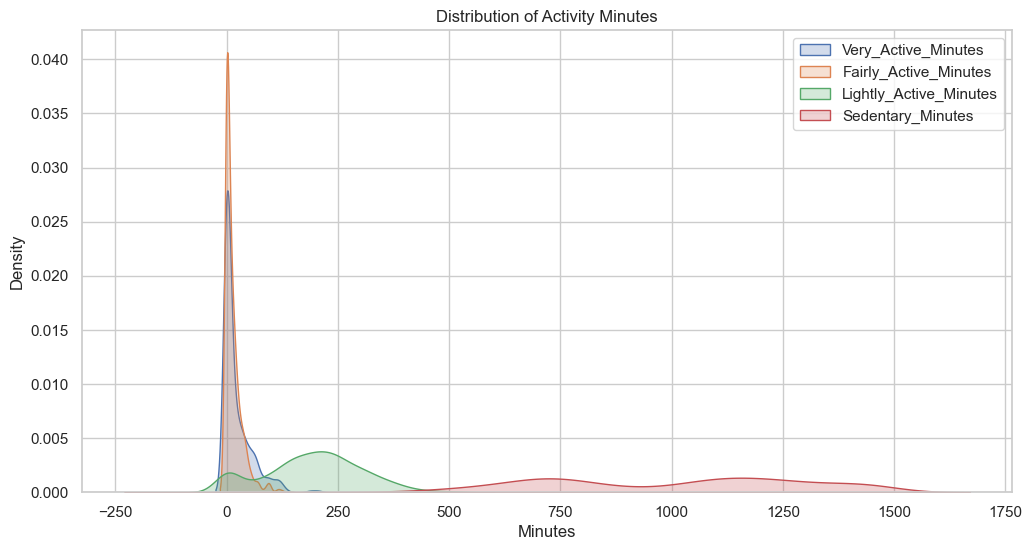

In [5]:
plt.figure(figsize=(12, 6))
for col in ['Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes']:
    sns.kdeplot(data[col], label=col, fill=True)
plt.title('Distribution of Activity Minutes')
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.legend()
plt.show()

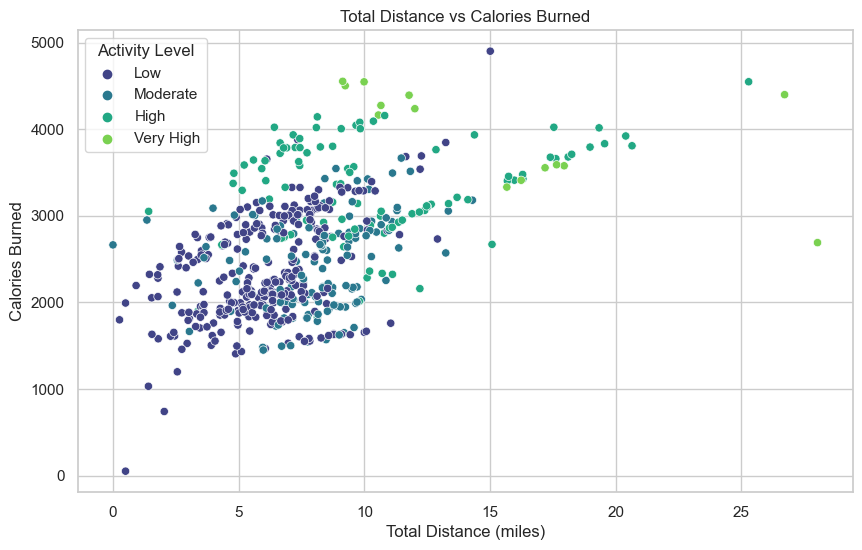

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total_Distance', y='Calories_Burned', hue='Activity_Level', palette='viridis')
plt.title('Total Distance vs Calories Burned')
plt.xlabel('Total Distance (miles)')
plt.ylabel('Calories Burned')
plt.legend(title='Activity Level')
plt.show()

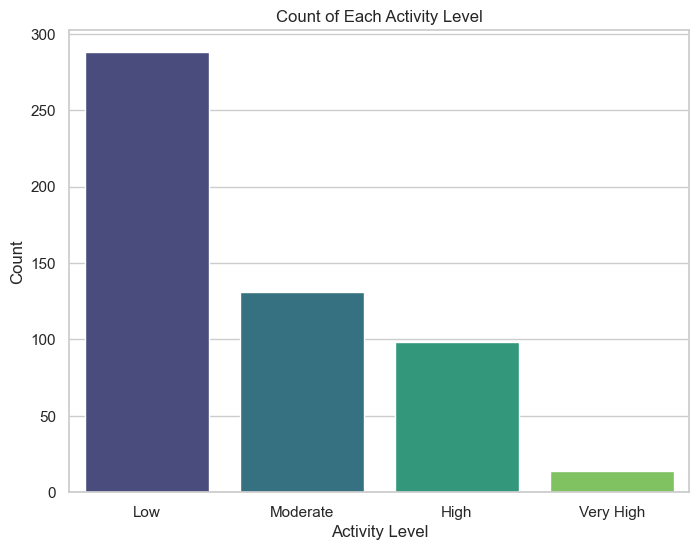

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Activity_Level', data=data, palette='viridis')
plt.title('Count of Each Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Count')
plt.show()

## Model Development

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
features = ['Total_Distance', 'Very_Active_Minutes', 'Calories_Burned']
X = data[features]
y = data['Activity_Level_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy

In [12]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 87.23%


### Save the Model

In [13]:
import joblib
joblib.dump(knn,"models/model-V1")
print("Model Saved Successfully")

Model Saved Successfully


### Utility Function

In [14]:
def recommend_activities(activity_level):
    if activity_level == 'Low':
        return [
            "Walk for at least 15-30 minutes each day.",
            "Try light exercises like stretching, bodyweight squats, and lunges.",
            "Take short breaks to stand up and move during the day.",
            "Set a small step goal (e.g., 5,000 steps) and gradually increase."
        ]
    elif activity_level == 'Moderate':
        return [
            "Incorporate 30-45 minutes of brisk walking, cycling, or swimming 3-4 times a week.",
            "Add high-intensity intervals to your workouts.",
            "Include strength training exercises twice a week.",
            "Aim for 10,000 steps per day and 150 minutes of moderate activity weekly."
        ]
    elif activity_level == 'High':
        return [
            "Try more intense workouts like running, spinning, or HIIT.",
            "Cross-train with yoga, strength training, and cardio.",
            "Work out 4-5 times a week with a mix of moderate and vigorous activities.",
            "Consider personalized plans like resistance training or targeted cardio."
        ]
    elif activity_level == 'Very High':
        return [
            "Include rest and recovery days to prevent burnout.",
            "Try advanced training like plyometrics or endurance activities.",
            "Track detailed performance metrics (e.g., heart rate, VO2 max).",
            "Add flexibility exercises like yoga to prevent injuries and improve mobility."
        ]
    else:
        return ["Activity level not recognized. Please consult a health professional for personalized advice."]

### Test Case

In [15]:
new_user = pd.DataFrame([[5.0, 45, 300]], columns=features)
new_user_scaled = scaler.transform(new_user)
recommended_level_encoded = knn.predict(new_user_scaled)
recommended_level = label_encoder.inverse_transform(recommended_level_encoded)
print("Recommended Activity Level for New User:", recommended_level[0])
activity_recommendations = recommend_activities(recommended_level[0])
print(f"Recommended Activities for {recommended_level[0]} Activity Level:")
for recommendation in activity_recommendations:
    print("- " + recommendation)


Recommended Activity Level for New User: Low
Recommended Activities for Low Activity Level:
- Walk for at least 15-30 minutes each day.
- Try light exercises like stretching, bodyweight squats, and lunges.
- Take short breaks to stand up and move during the day.
- Set a small step goal (e.g., 5,000 steps) and gradually increase.
